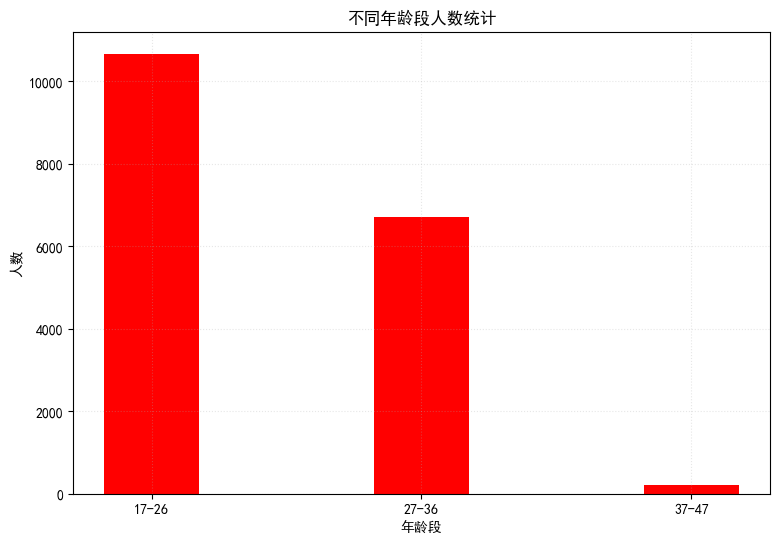

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# 读取数据  设置编码  不然会报错
df = pd.read_csv('soccer.csv', encoding='gbk')
# 将运动员年龄（Age）划分为三个年龄段
age_group = ["17-26", "27-36", "37-47"]
# 统计不同年龄段人数
count_1 = df[(df['Age'] >= 17) & (df['Age'] <= 26)]
count_2 = df[(df['Age'] >= 27) & (df['Age'] <= 36)]
count_3 = df[(df['Age'] >= 37) & (df['Age'] <= 47)]
age_counts = [len(count_1), len(count_2), len(count_3)]
# 设置大小   像素
plt.figure(figsize=(9, 6), dpi=100)
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 绘制柱形图  设置柱条的宽度和颜色
plt.bar(age_group, age_counts, width=0.35, color='red')
# 添加描述信息
plt.title('不同年龄段人数统计')
plt.xlabel('年龄段')
plt.ylabel('人数')
# 可以设置网格  透明度 线条样式
plt.grid(alpha=0.3, linestyle=':')
# 展示图片
plt.show()

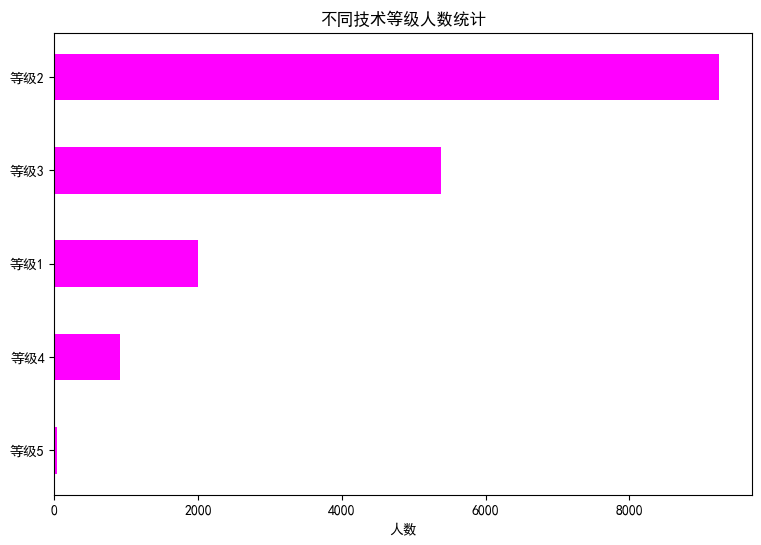

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
df = pd.read_csv('soccer.csv', encoding='gbk')
skill_count = df['Skill_Moves'].value_counts()
skill = [f'等级{m}' for m in skill_count.index]    # 列表推导式构造不同技术等级
counts = skill_count.values.tolist()               # 技术等级对应人数统计的列表
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置大小  像素
plt.figure(figsize=(9, 6), dpi=100)
# 绘制水平柱状图
plt.barh(skill[::-1], counts[::-1], height=0.5, color='#FF00FF')
plt.title('不同技术等级人数统计')
plt.xlabel('人数')
plt.show()

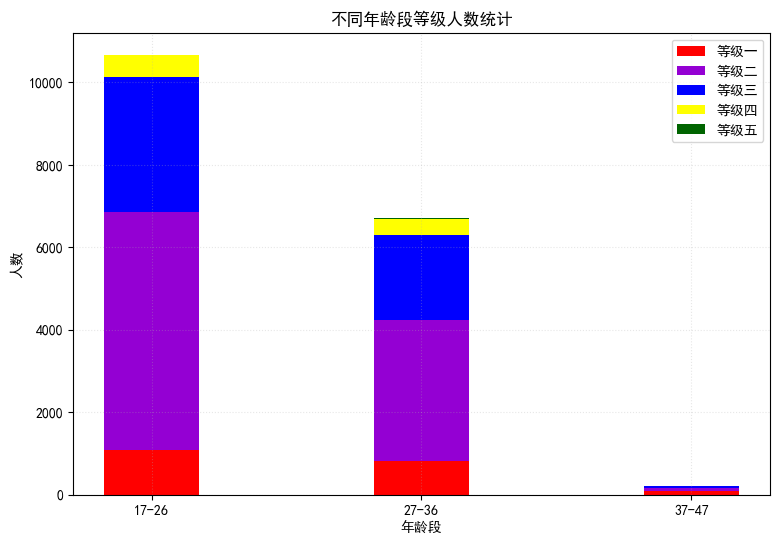

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np
import matplotlib as mpl
df = pd.read_csv('soccer.csv', encoding='gbk')
age_group = ["17-26", "27-36", "37-47"]
# & 与    | 或   不同条件之间 ()括起来
data1 = df[(17 <= df['Age']) & (df['Age'] <= 26)]
age1 = list(data1['Skill_Moves'])
data2 = df[(27 <= df['Age']) & (df['Age'] <= 36)]
age2 = list(data2['Skill_Moves'])
data3 = df[(37 <= df['Age']) & (df['Age'] <= 47)]
age3 = list(data3['Skill_Moves'])
# 分别统计三个年龄段 不同等级人数
count_1 = collections.Counter(age1).most_common()
count_2 = collections.Counter(age2).most_common()
count_3 = collections.Counter(age3).most_common()
count_3.append((5, 0))    # 37-47年龄段等级5人数为零  手动添上
counts = count_1 + count_2 + count_3
datas = [[] for i in range(5)]
for i in counts:
    datas[i[0] - 1].append(i[1])
# 转化为数组  堆叠时可以对应相加
grades = np.array(datas)
# print(grades)
# 设置大小   像素
plt.figure(figsize=(9, 6), dpi=100)
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
plt.bar(age_group, grades[0], label='等级一', color='red', width=0.35)
plt.bar(age_group, grades[1], bottom=grades[0], label="等级二", color="#9400D3", width=0.35)
plt.bar(age_group, grades[2], bottom=grades[0] + grades[1], label="等级三", color="#0000FF", width=0.35)
plt.bar(age_group, grades[3], bottom=grades[0] + grades[1] + grades[2], label="等级四", color="#FFFF00", width=0.35)
plt.bar(age_group, grades[4], bottom=grades[0] + grades[1] + grades[2] + grades[3], label="等级五", color="#006400", width=0.35)
plt.title('不同年龄段等级人数统计')
plt.xlabel('年龄段')
plt.ylabel('人数')
plt.grid(alpha=0.3, linestyle=':')
# 显示图例 位置
plt.legend(loc=0)
plt.show()

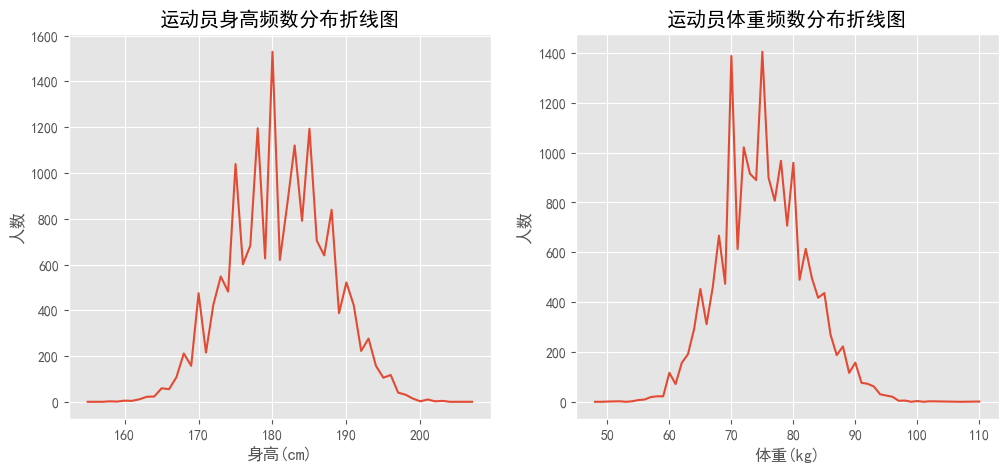

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
df = pd.read_csv('soccer.csv', encoding='gbk')
# <class 'pandas.core.series.Series'>
height = df['Height'].value_counts()
weight = df['Weight'].value_counts()
# SeriseL类型通过索引进行排序  也就是按身高从低到高排序
heights = height.sort_index()
weights = weight.sort_index()
mpl.rcParams['font.family'] = 'SimHei'
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(12, 5), dpi=100)
# 设置图形显示风格
plt.style.use('ggplot')
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
# 子图1
ax1.plot(heights.index, heights.values)
ax1.set_title('运动员身高频数分布折线图')
ax1.set_xlabel('身高(cm)')
ax1.set_ylabel('人数')
# 子图2
ax2.plot(weights.index, weights.values)
ax2.set_title('运动员体重频数分布折线图')
ax2.set_xlabel('体重(kg)')
ax2.set_ylabel('人数')
plt.show()

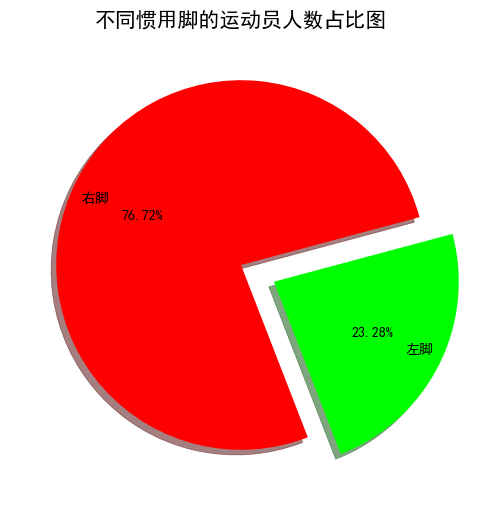

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
preffered_foot = list(pd.read_csv('soccer.csv', encoding='gbk')['Preffered_Foot'])
foot = ['右脚', '左脚']
counts = [preffered_foot.count('Right'), preffered_foot.count('Left')]
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置大小  像素
plt.figure(figsize=(9, 6), dpi=100)
plt.axes(aspect='equal')   # 保证饼图是个正圆
explodes = [0, 0.2]
color = ['red', '#00FF00']
# 绘制饼图
# x：统计数据   explode：是否突出显示    label：标签  color：自定义颜色
# autopct：设置百分比的格式,保留2位小数  shadow：  有阴影  看起来立体
# startangle：初始角度 可使饼图旋转      labeldistance：标签离圆心的位置
plt.pie(counts, explode=explodes, labels=foot,
        colors=color, autopct='%.2f%%', shadow=True,
        startangle=15, labeldistance=0.8,
        )
plt.title('不同惯用脚的运动员人数占比图', fontsize=15)
plt.show()

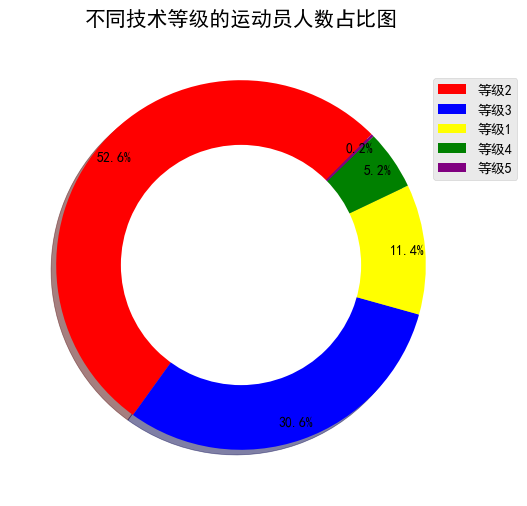

In [6]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import matplotlib as mpl
skill_moves = list(pd.read_csv('soccer.csv', encoding='gbk')['Skill_Moves'])
skill_count = collections.Counter(skill_moves).most_common()
skill = ['等级{}'.format(m[0]) for m in skill_count]
counts = [n[1] for n in skill_count]
# 设置大小  像素
plt.figure(figsize=(9, 6), dpi=100)
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
plt.axes(aspect='equal')   # 保证饼图是个正圆
x_ = [1, 0, 0, 0, 0]       # 用于显示空心
color = ["red", "blue", "yellow", "green", "purple"]
plt.pie(x=counts, colors=color, pctdistance=0.9,
        startangle=45, autopct='%.1f%%', shadow=True,
        )
# 小的空白圆填充  实现圆环效果
plt.pie(x_, radius=0.65, colors="w")
# 添加图例  可以微调位置
plt.legend(skill, bbox_to_anchor=(0.9, 0.92))
plt.title('不同技术等级的运动员人数占比图', fontsize=15)
plt.show()

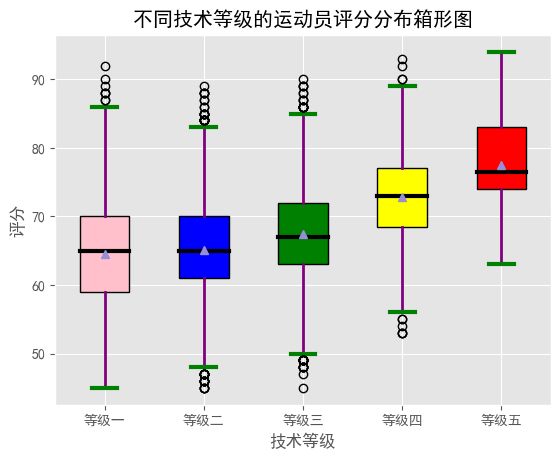

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
df = pd.read_csv('soccer.csv', encoding='gbk')
labels = [f'等级{i}' for i in ['一', '二', '三', '四', '五']]
data1 = df[df['Skill_Moves'] == 1]['Rating']
data2 = df[df['Skill_Moves'] == 2]['Rating']
data3 = df[df['Skill_Moves'] == 3]['Rating']
data4 = df[df['Skill_Moves'] == 4]['Rating']
data5 = df[df['Skill_Moves'] == 5]['Rating']
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置图形显示风格
plt.style.use('ggplot')
fig, ax = plt.subplots()
box_plot = ax.boxplot((data1, data2, data3, data4, data5), labels=labels,
                      boxprops={'color': 'black'}, showmeans=True, patch_artist=True,
                      )
colors = ['pink', 'blue', 'green', 'yellow', 'red']
# 填充箱子颜色
for patch, color in zip(box_plot['boxes'], colors):
    patch.set(facecolor=color)
# 设置箱子两端线的属性
for whisker in box_plot['whiskers']:
    whisker.set(color='purple', linewidth=2)
# 设置顶端和末端线条的属性
for cap in box_plot['caps']:
    cap.set(color='g', linewidth=3)
# 设置中位数的属性
for median in box_plot['medians']:
    median.set(color='black', linewidth=3)
plt.xlabel('技术等级')
plt.ylabel('评分')
plt.title('不同技术等级的运动员评分分布箱形图')
plt.show()

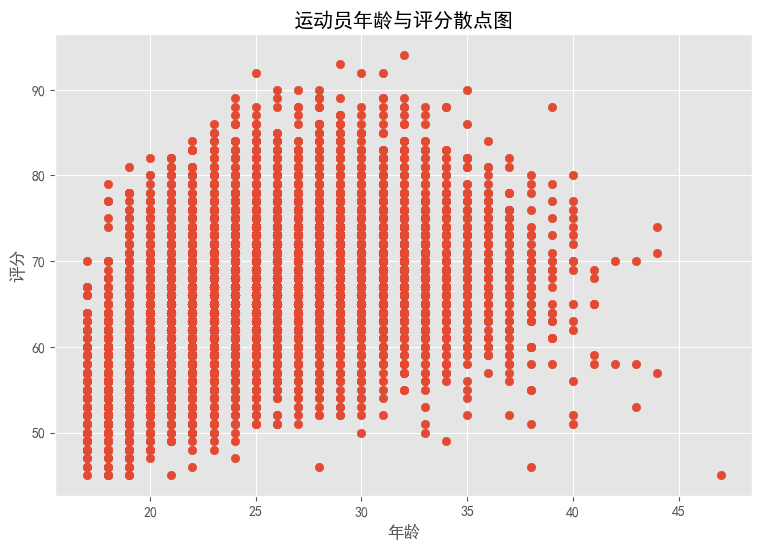

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
df= pd.read_csv('soccer.csv', encoding='gbk')
age, rating = list(df['Age']), list(df['Rating'])
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置图形显示风格
plt.style.use('ggplot')
# 设置大小  像素
plt.figure(figsize=(9, 6), dpi=100)
# 绘制散点图
plt.scatter(age, rating)
# 添加描述信息
plt.title('运动员年龄与评分散点图')
plt.xlabel('年龄')
plt.ylabel('评分')
plt.show()

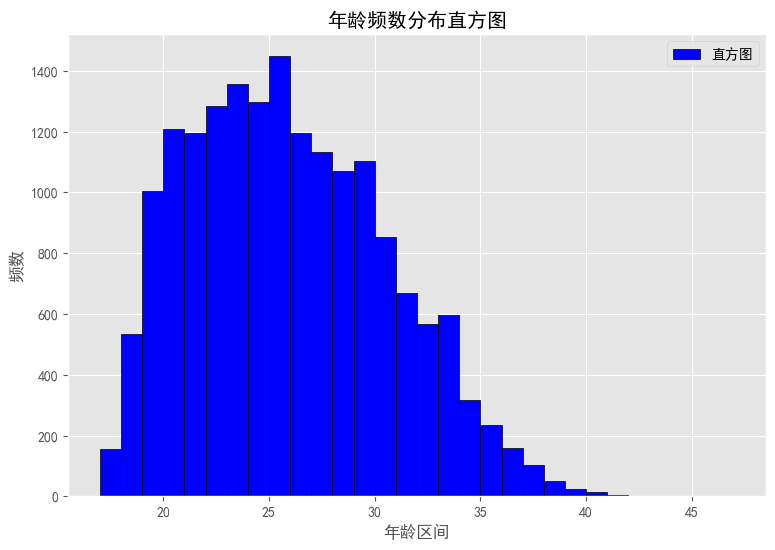

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
ages = list(pd.read_csv('soccer.csv', encoding='gbk')['Age'])
ages.sort()
# 设置中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置图形显示风格
plt.style.use('ggplot')
plt.figure(figsize=(9, 6), dpi=100)
bin_width = 1  # 设置组距   整除
num_bin = (max(ages) - min(ages)) // bin_width    # 组数
# 绘制直方图  x：指定要绘制直方图的数据
# bins：指定直方图条形的个数  color：设置直方图的填充色    edgecolor：指定直方图的边界色
plt.hist(x=ages, bins=num_bin, color='blue', edgecolor='k', label='直方图')   # 为直方图呈现标签
plt.xticks(range(20, 50, 5))     # 设置x轴刻度
# 添加描述信息
plt.xlabel('年龄区间')
plt.ylabel('频数')
plt.title('年龄频数分布直方图')
plt.legend()
plt.show()

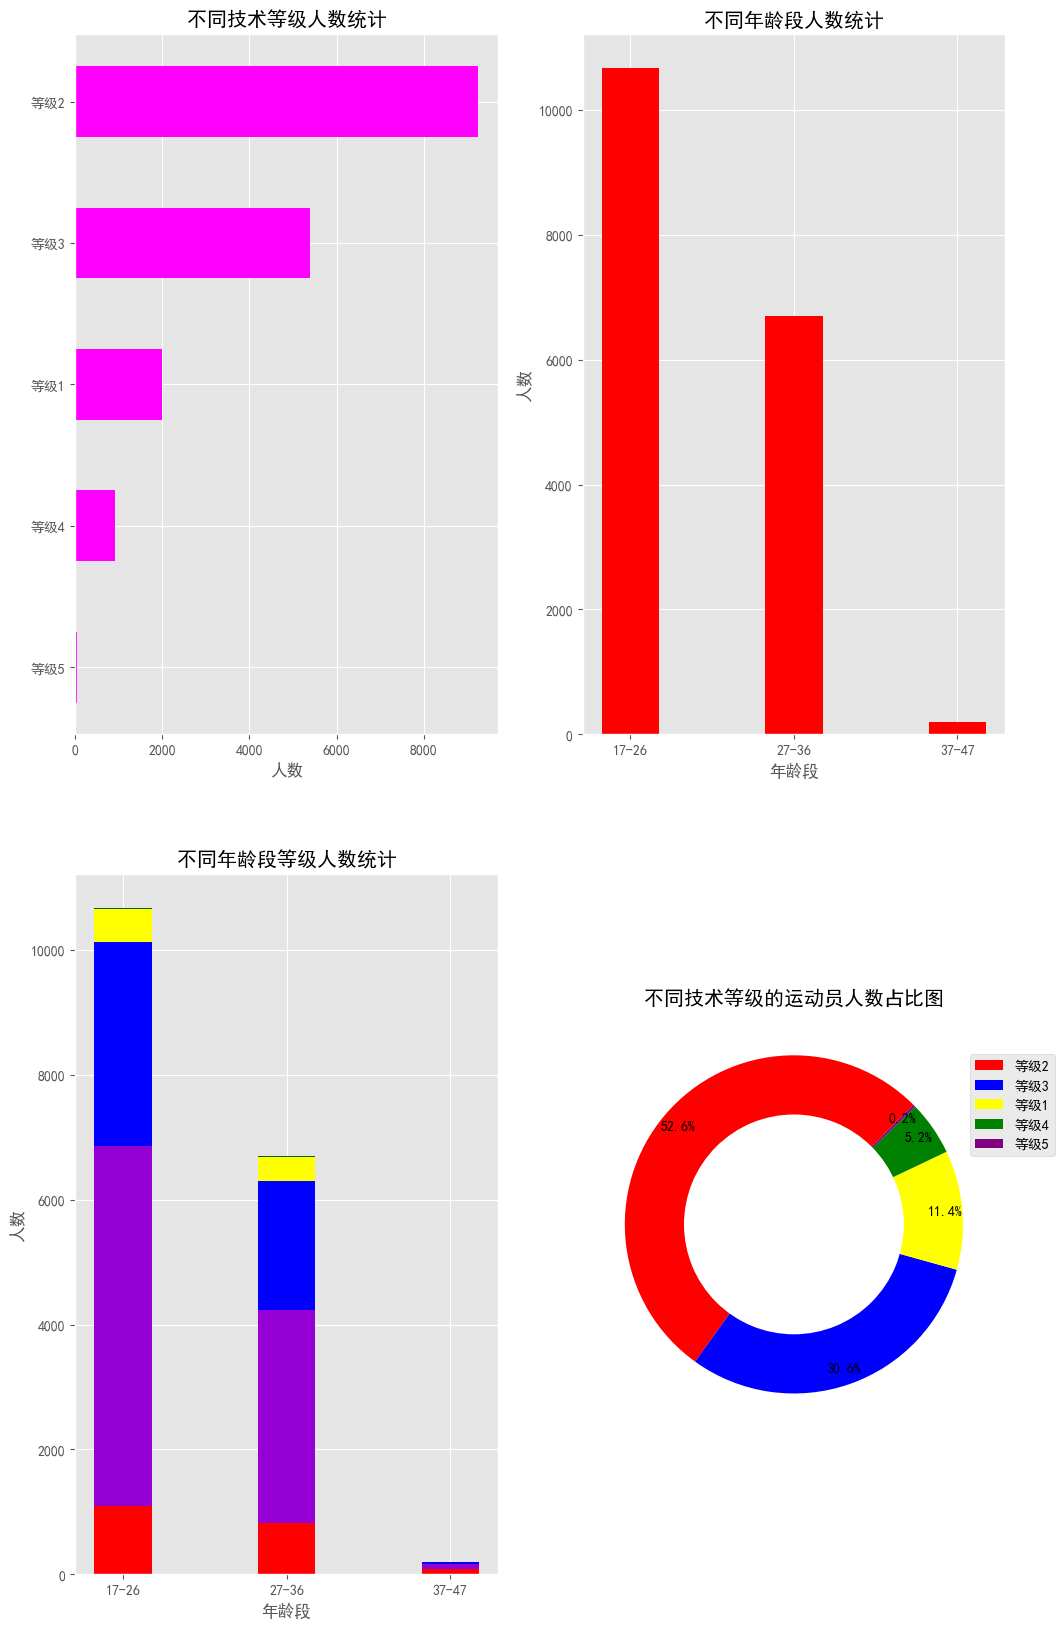

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import collections
import numpy as np
# 读取数据
df = pd.read_csv('soccer.csv', encoding='gbk')
# 子图1数据
skill_count = df['Skill_Moves'].value_counts()
skill = [f'等级{m}' for m in skill_count.index]    # 列表推导式构造不同技术等级
counts = skill_count.values.tolist()               # 技术等级对应人数统计的列表
# 子图2数据
age_group = ["17-26", "27-36", "37-47"]
count_1 = df[(df['Age'] >= 17) & (df['Age'] <= 26)]
count_2 = df[(df['Age'] >= 27) & (df['Age'] <= 36)]
count_3 = df[(df['Age'] >= 37) & (df['Age'] <= 47)]
age_counts = [len(count_1), len(count_2), len(count_3)]
# 子图3数据
# &符号 并且    |符号 或   不同条件之间 ()括起来
data1 = df[(17 <= df['Age']) & (df['Age'] <= 26)]
age1 = list(data1['Skill_Moves'])
data2 = df[(27 <= df['Age']) & (df['Age'] <= 36)]
age2 = list(data2['Skill_Moves'])
data3 = df[(37 <= df['Age']) & (df['Age'] <= 47)]
age3 = list(data3['Skill_Moves'])
# 分别统计三个年龄段 不同等级人数
count_1 = collections.Counter(age1).most_common()
count_2 = collections.Counter(age2).most_common()
count_3 = collections.Counter(age3).most_common()
count_3.append((5, 0))    # 37-47年龄段等级5人数为零  手动填上
age_counts3 = count_1 + count_2 + count_3
datas = [[] for i in range(5)]
for i in age_counts3:
    datas[i[0]-1].append(i[1])
grades = np.array(datas)
# 子图4数据
skill_moves = list(df['Skill_Moves'])
skill_count = collections.Counter(skill_moves).most_common()
skill = ['等级{}'.format(m[0]) for m in skill_count]
counts = [n[1] for n in skill_count]
# 绘制多个子图
mpl.rcParams['font.family'] = 'SimHei'
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(12, 20), dpi=100)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax1.barh(skill[::-1], counts[::-1], height=0.5, color='#FF00FF')
ax1.set_xlabel('人数')
ax1.set_title('不同技术等级人数统计')
ax2.bar(age_group, age_counts, width=0.35, color='red')
ax2.set_title('不同年龄段人数统计')
ax2.set_xlabel('年龄段')
ax2.set_ylabel('人数')
ax3.bar(age_group, grades[0], label='等级一', color='red', width=0.35)
ax3.bar(age_group, grades[1], bottom=grades[0], label="等级二", color="#9400D3", width=0.35)
ax3.bar(age_group, grades[2], bottom=grades[0] + grades[1], label="等级三", color="#0000FF", width=0.35)  # 转化为数组  直接相加
ax3.bar(age_group, grades[3], bottom=grades[0] + grades[1] + grades[2], label="等级四", color="#FFFF00", width=0.35)
ax3.bar(age_group, grades[4], bottom=grades[0] + grades[1] + grades[2] + grades[3], label="等级五", color="#006400", width=0.35)
ax3.set_title('不同年龄段等级人数统计')
ax3.set_xlabel('年龄段')
ax3.set_ylabel('人数')
x_ = [1, 0, 0, 0, 0]       # 用于显示空心
color = ["red", "blue", "yellow", "green", "purple"]
# 正圆
ax4.set_aspect(aspect='equal')
ax4.pie(x=counts, colors=color, pctdistance=0.9,
        startangle=45, autopct='%.1f%%',
        )
ax4.pie(x_, radius=0.65, colors="w")   # 小的空白圆填充
ax4.set_title('不同技术等级的运动员人数占比图')
# 调整图例位置
plt.legend(skill, bbox_to_anchor=(0.9, 0.92))
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
df = pd.read_excel('real_estate_info.xlsx')
area = df['土地位置']
# 成都主要 区 县 市  9区6县4市
with open('test.txt', encoding='utf-8') as f:
    areas = f.read().split('、')
for item in areas:
    # 每个行政区 对每行数据都进行判断
    # 土地位置里包含行政区名  值为规划建筑面积   不包含  值为0
    # 得到19列 以行政区为列名 其下面值为规划建筑面积
    df[item] = [eval(df.loc[x, '规划建筑面积'][:-1]) if item in df.loc[x, '土地位置'] else 0 for x in range(len(df['土地位置']))]
date = df['推出时间'].str.split('年', expand=True)[0]   # 这列的字符串 按年切割
df['年份'] = date        # 添加新的一列  年份
df1 = df[areas]
df1.index = df['年份']
df2 = df1.groupby('年份').sum()
# print(df2.iloc[:5, ::])  # 2020年数据只有到2月的  舍去
# print(type(df2.iloc[:5, ::].T))     # 转置
datas = np.array(df2.iloc[:5, ::].T)   # 19行 5列 二维数组
print(datas)
x_label = [year for year in range(2015, 2020)]
y_label = areas
mpl.rcParams['font.family'] = 'Kaiti'     # 中文显示
fig, ax = plt.subplots(figsize=(15, 9))   # 绘图
heatmap = plt.pcolor(datas)
for y in range(datas.shape[0]):
    for x in range(datas.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.1f' % datas[y, x],    # 热力图种每个格子添加文本  数据项设置
                 horizontalalignment='center', verticalalignment='center',
                 )
# x y轴刻度设置
plt.xticks(np.arange(0.5, 5.5, 1))
plt.yticks(np.arange(0.5, 19.5, 1))
# x y轴标签设置
ax.set_xticklabels(x_label)
ax.set_yticklabels(areas)
# title
ax.set_title(r'各行政区2015-2019年的总规划建筑面积(平方米)', fontsize=25, x=0.5, y=1.02)
# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('heat_map.png')
# 热力图   展示
plt.colorbar(heatmap)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'real_estate_info.xlsx'